#### [ Boxplot 그래프 ]
- 컬럼의 이상치 확인

In [2]:
# [1] 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# [2] 데이터 준비
F_DATA=r"C:\Users\KDP-50\OneDrive\바탕 화면\PANDAS06\Day08\auto_mpg.csv"

In [4]:
# [3] CSV => DataFrame으로 저장
dataDF=pd.read_csv(F_DATA)

In [5]:
# - 컬럼별 타입 확인
dataDF.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [6]:
# [4] 연비와 관련이 높은 컬럼 즉, 변수 확인
# - [4-1] 상관계수 확인
dataDF.corr(numeric_only=True)

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


In [7]:
dataDF.corr(numeric_only=True)['mpg']

mpg             1.000000
cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
acceleration    0.420289
model year      0.579267
origin          0.563450
Name: mpg, dtype: float64

In [8]:
corrSR=dataDF.corr(numeric_only=True)['mpg']

In [9]:
corrSR2=dataDF.corr(numeric_only=True)['mpg']['weight']

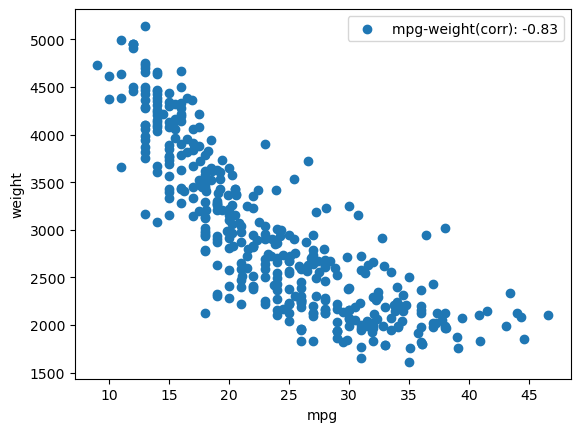

In [10]:
# - [4-2] 시각화
plt.scatter(dataDF.mpg, dataDF.weight, label=f"mpg-weight(corr): {round(corrSR2,2)}")
plt.xlabel('mpg')
plt.ylabel('weight')
plt.legend()
plt.show()

In [11]:
dataDF.iloc[:,3]

0      130
1      165
2      150
3      150
4      140
      ... 
393     86
394     52
395     84
396     79
397     82
Name: horsepower, Length: 398, dtype: object

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


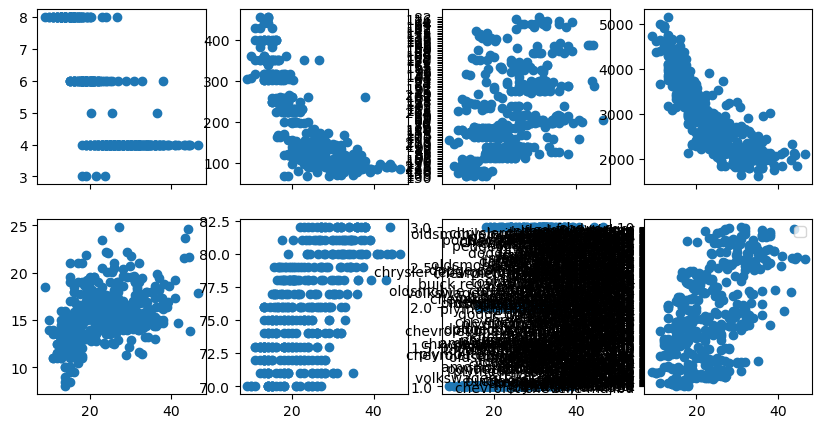

In [12]:
# - [4-3] mpg 컬럼과 다른 컬럼과의 관계 시각화 

fig=plt.figure(figsize=[10,5])
axes = fig.subplots(2,4, sharex=True)

cnt=0
for i in range(2):
    for j in range(4):
        axes[i,j].scatter(dataDF.mpg, dataDF.iloc[:,cnt+1])
        cnt+=1

# plt.xlabel('mpg')
# plt.ylabel('weight')
plt.legend()
plt.show()

In [13]:
corrSR.index

Index(['mpg', 'cylinders', 'displacement', 'weight', 'acceleration',
       'model year', 'origin'],
      dtype='object')

Text(0.5, 0.98, '[mpg&others]')

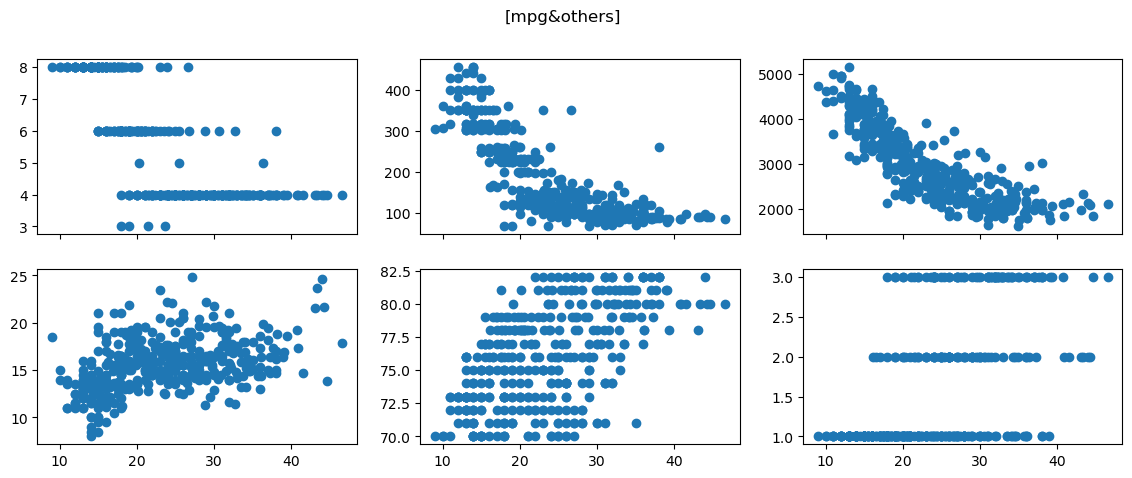

In [14]:
# - [4-3] mpg 컬럼과 다른 컬럼과의 관계 시각화
# - (1) 그래프 담을 창 생성
fig=plt.figure(figsize=[14,5])

# - (2) 그래프 담을 공간 생성 axes
axes=fig.subplots(2,3, sharex=True)
for row in range(2):
    for col in range(3):
        col_name=corrSR.index[row*3+col+1]
        axes[row, col].scatter(dataDF.mpg, dataDF[col_name], label=f'corr: {round(corrSR[col_name], 2)}')

plt.suptitle('[mpg&others]')

In [15]:
# [4] 컬럼별로 이상한 값 즉, 이상치 체크 및 시각화
dataDF.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


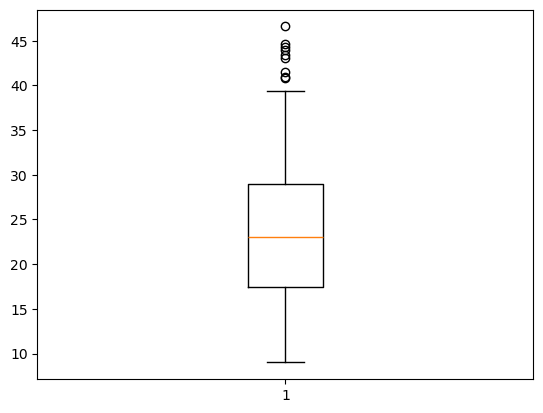

In [23]:
# - 박스 그래프로 시각화
retDict=plt.boxplot(dataDF['mpg'],whis=1.0)
plt.show()

In [24]:
# 박스 그래프에서 받은 결과 확인
for k,v in retDict.items():
    print(k)
    for _ in v:
        print(_.get_data())

whiskers
(array([1, 1]), array([17.5,  9. ]))
(array([1, 1]), array([29. , 39.4]))
caps
(array([0.9625, 1.0375]), array([9., 9.]))
(array([0.9625, 1.0375]), array([39.4, 39.4]))
boxes
(array([0.925, 1.075, 1.075, 0.925, 0.925]), array([17.5, 17.5, 29. , 29. , 17.5]))
medians
(array([0.925, 1.075]), array([23., 23.]))
fliers
(array([1., 1., 1., 1., 1., 1., 1., 1., 1.]), array([43.1, 41.5, 46.6, 40.8, 44.3, 43.4, 44.6, 40.9, 44. ]))
means


In [29]:
# 하위/상위 이상치 값 추출
outliers=retDict['caps']
low_outlier=outliers[0].get_data()[1].tolist()[0]
up_outlier=outliers[1].get_data()[1].tolist()[0]
low_outlier, up_outlier

(9.0, 39.4)

In [33]:
# dataDF[(dataDF['mpg'] < low_outlier)]

In [34]:
# dataDF[(dataDF['mpg'] > up_outlier)]

In [36]:
# 이상치 처리
dataDF[(dataDF['mpg'] < low_outlier) | (dataDF['mpg'] > up_outlier)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
244,43.1,4,90.0,48,1985,21.5,78,2,volkswagen rabbit custom diesel
309,41.5,4,98.0,76,2144,14.7,80,2,vw rabbit
322,46.6,4,86.0,65,2110,17.9,80,3,mazda glc
324,40.8,4,85.0,65,2110,19.2,80,3,datsun 210
325,44.3,4,90.0,48,2085,21.7,80,2,vw rabbit c (diesel)
326,43.4,4,90.0,48,2335,23.7,80,2,vw dasher (diesel)
329,44.6,4,91.0,67,1850,13.8,80,3,honda civic 1500 gl
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
